In [2]:
#import required modules
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools

%matplotlib inline
#load file
DIR = "C:/Users/olgaa/Desktop/Sebas/Thesis/Results/DistanceVSIterations/"
ext = ".txt"

In [3]:
def loadStatistics(name):
    data = np.loadtxt(DIR + name + ext, delimiter=',')[:50]
    return {"mean" : data[:,0], "std" : data[:,1], "max" : data[:,2], "min" : data[:,3]}    

In [4]:
def graphFunction(stats, ymin = None, ymax = None, step = 5, offset = 5, info = "", linthresh = 0.001, log = True):
    fig, ax = plt.subplots(figsize=(15,5))
    its = len(stats["min"])
    #ax.plot(stats["min"], 'C0', label = 'mininum error', marker = ".")
    ax.plot(stats["mean"], 'C2', label = 'mean', marker = ".")
    #ax.plot(stats["max"], 'c', label = 'maximum error', marker = ".")
    if(log): ax.set_yscale('symlog', linthreshy = linthresh, linscale = 6)
    else:
        ax.errorbar([x for x in range(0,its,step)], stats["mean"][::step], stats["std"][::step], linestyle='None', marker='o', color = 'C2')    
    
    ax.set_ylabel('Distance between target and end effector')
    ax.set_xlabel('Iterations')
    ax.set_title('Evolution of distance between target and effector as the number of iterations increases' + info)
    ax.legend(loc='upper left')
    plt.show()

In [5]:
def graphBenchmark(solvers_stats, ymin = None, ymax = None, step = 5, offset = 5, info = "", linthresh = 0.001, log = True):
    fig, ax = plt.subplots(figsize=(15,5))
    its = len(solvers_stats[0]["min"])
    N = len(solvers_stats)
    colormap = mpl.cm.Dark2.colors   # Qualitative colormap
    for i,color in zip(range(N),colormap):
        ax.plot(solvers_stats[i]["mean"], color = color, label = solvers_stats[i]["name"], marker = ".")    
        if(log): ax.set_yscale('symlog', linthreshy = linthresh, linscale = 6)
    
    ax.set_ylabel('Mean distance between target and end effector')
    ax.set_xlabel('Iterations')
    ax.set_title('Evolution of mean distance between target and effector as the number of iterations increases' + info)
    ax.legend(loc='upper left')
    plt.show()

In [6]:
def plotStats(file, step = 5, offset = 5, info = "", linthresh = 0.001, log = True):
    stats = loadStatistics(file)
    graphFunction(stats, step = step, offset = offset, info = info, linthresh = linthresh, log = log)
    print("best : " + str(stats["min"][-1]))    
    print("worst : " + str(stats["max"][-1]))    
    print("avg : " + str(stats["mean"][-1]) + " std : " + str(stats["std"][-1]))    
    return stats["min"][-1]

In [7]:
def plotBenchmarkStats(files, step = 5, offset = 5, info = "", linthresh = 0.001, log = True):
    solvers_stats = []
    for file in files:
        stats = loadStatistics(file)
        stats["name"] = file.split("_joints")[0].replace("_", " ")
        solvers_stats.append(stats)
    graphBenchmark(solvers_stats, step = step, offset = offset, info = info, linthresh = linthresh, log = log)


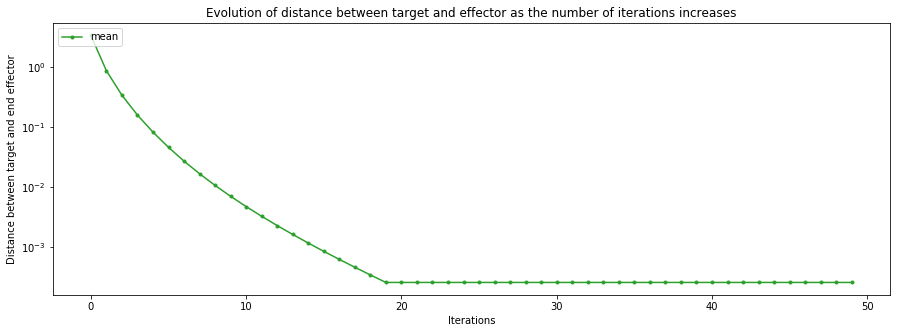

best : 0.0
worst : 0.36964151263237
avg : 0.0002605677235611836 std : 0.0


In [47]:
plotStats("CCD_joints_10_postures_10000_discontinuous_path", info = "", linthresh = 0.000001)
pass

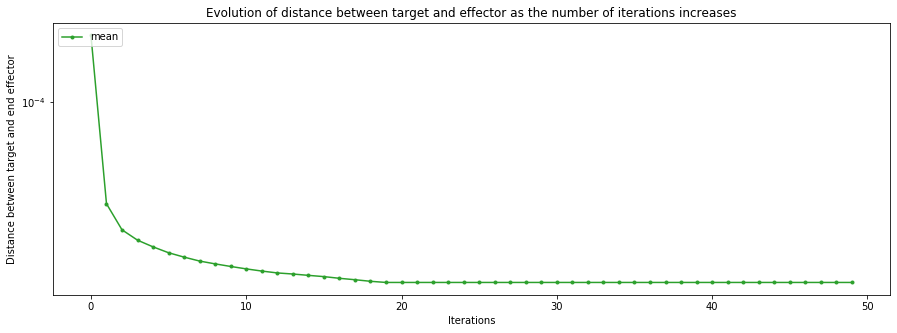

best : 0.0
worst : 0.0001392364501953125
avg : 2.6177477935760863e-05 std : 0.0


In [48]:
plotStats("FABRIK_joints_10_postures_10000_discontinuous_path", info = "", linthresh = 0.000001)
pass

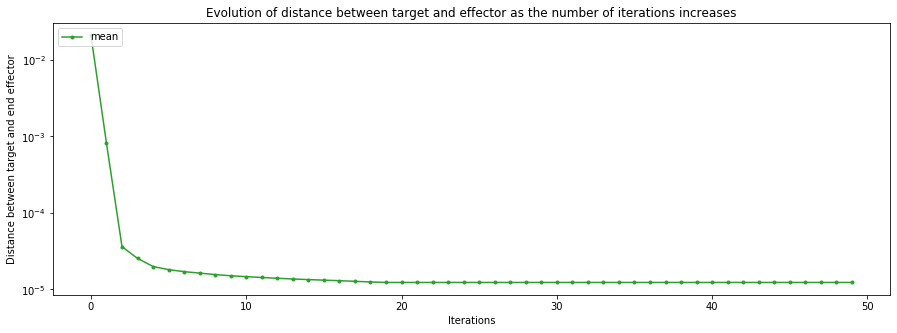

best : 0.0
worst : 0.00014359687338583171
avg : 1.235928529500825e-05 std : 0.0


In [49]:
plotStats("FORWARD_TRIANGULATION_TRIK_joints_10_postures_10000_discontinuous_path", info = "", linthresh = 0.000001)
pass

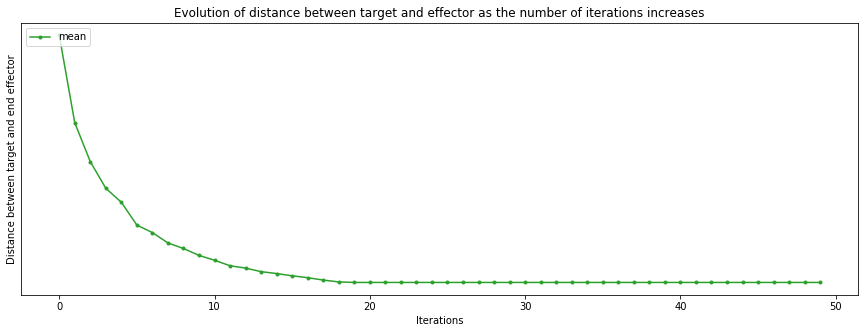

best : 0.0
worst : 0.00013037114695180207
avg : 1.8129118798384525e-06 std : 0.0


In [50]:
plotStats("FINAL_TRIK_joints_10_postures_10000_discontinuous_path", info = "", linthresh = 0.000001)
pass

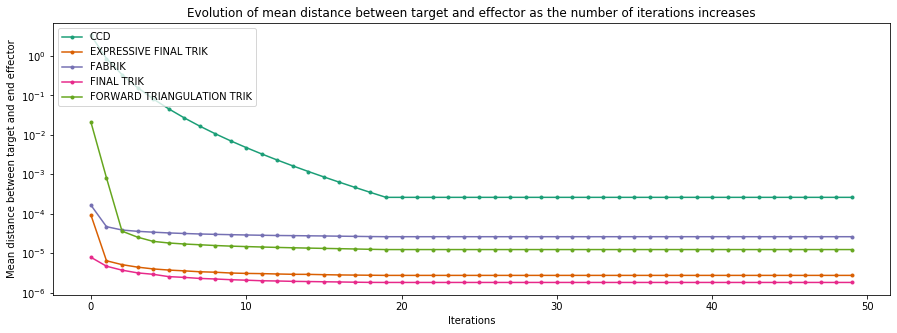

In [51]:
#unconstrained benchmark
files = ["CCD_joints_10_postures_10000_discontinuous_path",
         "EXPRESSIVE_FINAL_TRIK_joints_10_postures_10000_discontinuous_path",
         "FABRIK_joints_10_postures_10000_discontinuous_path",
         "FINAL_TRIK_joints_10_postures_10000_discontinuous_path",
         "FORWARD_TRIANGULATION_TRIK_joints_10_postures_10000_discontinuous_path"
        ]

plotBenchmarkStats(files, step = 5, offset = 5, info = "", linthresh = 0.0000001, log = True)


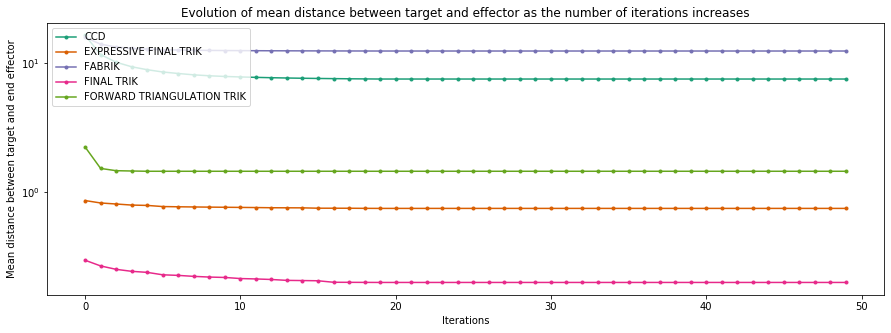

In [52]:
#aligned hinge benchmark
files = ["CCD_joints_10_postures_10000_HINGE_ALIGNED_discontinuous_path",
         "EXPRESSIVE_FINAL_TRIK_joints_10_postures_10000_HINGE_ALIGNED_discontinuous_path",
         "FABRIK_joints_10_postures_10000_HINGE_ALIGNED_discontinuous_path",
         "FINAL_TRIK_joints_10_postures_10000_HINGE_ALIGNED_discontinuous_path",
         "FORWARD_TRIANGULATION_TRIK_joints_10_postures_10000_HINGE_ALIGNED_discontinuous_path"
        ]

plotBenchmarkStats(files, step = 5, offset = 5, info = "", linthresh = 0.0001, log = True)


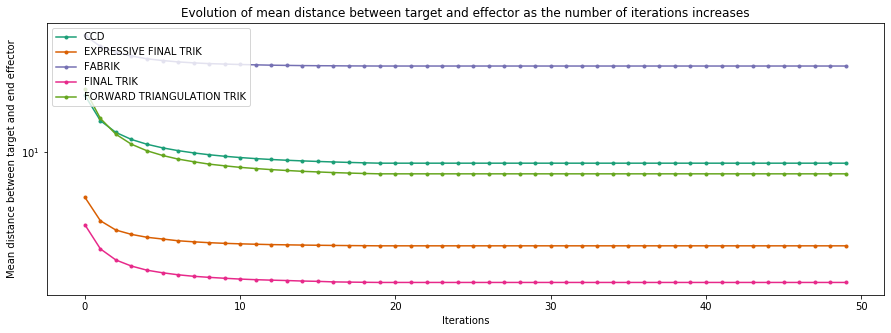

In [53]:
#unaligned hinge benchmark
files = ["CCD_joints_10_postures_10000_HINGE_discontinuous_path",
         "EXPRESSIVE_FINAL_TRIK_joints_10_postures_10000_HINGE_discontinuous_path",
         "FABRIK_joints_10_postures_10000_HINGE_discontinuous_path",
         "FINAL_TRIK_joints_10_postures_10000_HINGE_discontinuous_path",
         "FORWARD_TRIANGULATION_TRIK_joints_10_postures_10000_HINGE_discontinuous_path"
        ]

plotBenchmarkStats(files, step = 5, offset = 5, info = "", linthresh = 0.0001, log = True)


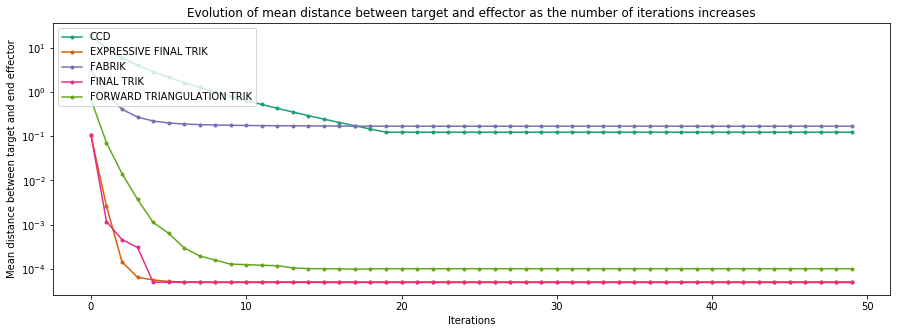

In [54]:
#unaligned hinge benchmark
files = ["CCD_joints_10_postures_10000_CONE_CIRCLE_discontinuous_path",
         "EXPRESSIVE_FINAL_TRIK_joints_10_postures_10000_CONE_CIRCLE_discontinuous_path",
         "FABRIK_joints_10_postures_10000_CONE_CIRCLE_discontinuous_path",
         "FINAL_TRIK_joints_10_postures_10000_CONE_CIRCLE_discontinuous_path",
         "FORWARD_TRIANGULATION_TRIK_joints_10_postures_10000_CONE_CIRCLE_discontinuous_path"
        ]

plotBenchmarkStats(files, step = 5, offset = 5, info = "", linthresh = 0.0001, log = True)


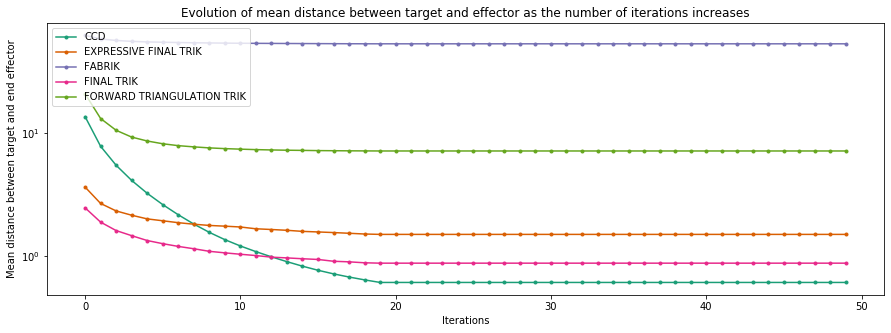

In [55]:
#mix benchmark
files = ["CCD_joints_10_postures_10000_MIX_discontinuous_path",
         "EXPRESSIVE_FINAL_TRIK_joints_10_postures_10000_MIX_discontinuous_path",
         "FABRIK_joints_10_postures_10000_MIX_discontinuous_path",
         "FINAL_TRIK_joints_10_postures_10000_MIX_discontinuous_path",
         "FORWARD_TRIANGULATION_TRIK_joints_10_postures_10000_MIX_discontinuous_path"
        ]

plotBenchmarkStats(files, step = 5, offset = 5, info = "", linthresh = 0.00001, log = True)


In [10]:
#mix benchmark
files = ["CCD_joints_10_postures_10001_MIX_discontinuous_path",
         "EXPRESSIVE_FINAL_TRIK_joints_10_postures_10001_CONE_ELLIPSE_discontinuous_path",
         "FABRIK_joints_10_postures_10001_CONE_ELLIPSE_discontinuous_path",
         "FINAL_TRIK_joints_10_postures_10001_CONE_ELLIPSE_discontinuous_path",
         "FORWARD_TRIANGULATION_TRIK_joints_10_postures_10001_CONE_ELLIPSE_discontinuous_path"
        ]

plotBenchmarkStats(files, step = 5, offset = 5, info = "", linthresh = 0.00001, log = True)


OSError: C:/Users/olgaa/Desktop/Sebas/Thesis/Results/DistanceVSIterations/EXPRESSIVE_FINAL_TRIK_joints_10_postures_10001_CONE_ELLIPSE_discontinuous_path.txt not found.